In [84]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re

In [85]:
os.getcwd()

'/home/dani94/Data_mortalidad/mortalidad-hospital-erasmo/dataset'

In [86]:
os.chdir('/home/dani94/Data_mortalidad/mortalidad-hospital-erasmo/dataset')

In [87]:
data = pd.read_csv('clean_mortalidad_historico.csv')

In [88]:
data.head(-5)

,FECHA,DIAGNOSTICO,FECHA NACIO,SEXO,año,SERVICIO_NEONATOLOGIA,SERVICIO_PEDIATRIA MEDICA,SERVICIO_RECUPERACION,SERVICIO_SALA DE PARTOS,SERVICIO_UCIN,SERVICIO_UNIDAD DE CUIDADO INTERMEDIO,SERVIVIO_PISO_5_12,SERVICIO_URGENCIA ADULTO,SERVICIOS_URGENCIA PEDIATRIA,edad
0,2018-08-30 10:22:16,DIARREA Y GASTROENTERITIS DE PRESUNTO ORIGEN I...,2017-11-05 12:00:00,0,2018,False,False,False,False,False,False,False,False,True,0
1,2018-10-07 07:59:50,DIARREA Y GASTROENTERITIS DE PRESUNTO ORIGEN I...,1989-06-09 12:00:00,1,2018,False,False,False,False,False,False,False,True,False,29
2,2018-06-20 02:59:47,DIARREA Y GASTROENTERITIS DE PRESUNTO ORIGEN I...,1938-05-23 12:00:00,1,2018,False,False,False,False,False,False,False,True,False,80
3,2018-04-05 05:23:01,DIARREA Y GASTROENTERITIS DE PRESUNTO ORIGEN I...,2017-08-01 12:00:00,1,2018,False,False,False,False,False,False,False,False,True,0
4,2018-11-10 04:35:50,"TUBERCULOSIS DEL PULMON, CONFIRMADA POR HALLAZ...",1982-02-02 12:00:00,0,2018,False,False,False,False,False,False,False,True,False,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6526,2022-01-01 11:50:00,COVID-19 (virus no identificado),1929-05-07 12:00:00,0,2022,False,False,False,False,False,False,False,True,False,92
6527,2022-03-02 05:59:27,COVID-19 (virus no identificado),1935-03-05 12:00:00,1,2022,False,False,False,False,False,False,False,True,False,86
6528,2022-02-09 09:16:25,COVID-19 (virus no identificado),1938-06-05 12:00:00,1,2022,False,False,False,False,False,False,False,True,False,83
6529,2022-09-13 08:31:12,"DISPARO DE OTRAS ARMAS DE FUEGO, Y LAS NO ESPE...",1996-04-02 12:00:00,1,2022,False,False,False,False,False,False,False,True,False,26


In [89]:
data.dtypes

FECHA                                    object
DIAGNOSTICO                              object
FECHA NACIO                              object
SEXO                                      int64
año                                       int64
SERVICIO_NEONATOLOGIA                      bool
SERVICIO_PEDIATRIA MEDICA                  bool
SERVICIO_RECUPERACION                      bool
SERVICIO_SALA DE PARTOS                    bool
SERVICIO_UCIN                              bool
SERVICIO_UNIDAD DE CUIDADO INTERMEDIO      bool
SERVIVIO_PISO_5_12                         bool
SERVICIO_URGENCIA ADULTO                   bool
SERVICIOS_URGENCIA PEDIATRIA               bool
edad                                      int64
dtype: object

In [90]:
data.describe()

,SEXO,año,edad
count,6536.000000,6536.000000,6536.000000
mean,0.415698,2020.281365,61.923654
std,0.492880,1.253095,21.543007
min,0.000000,2018.000000,-1.000000
25%,0.000000,2019.000000,51.000000
50%,0.000000,2021.000000,66.000000
75%,1.000000,2021.000000,78.000000
max,1.000000,2022.000000,106.000000


In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6536 entries, 0 to 6535
Data columns (total 15 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   FECHA                                  6536 non-null   object
 1   DIAGNOSTICO                            6536 non-null   object
 2   FECHA NACIO                            6536 non-null   object
 3   SEXO                                   6536 non-null   int64 
 4   año                                    6536 non-null   int64 
 5   SERVICIO_NEONATOLOGIA                  6536 non-null   bool  
 6   SERVICIO_PEDIATRIA MEDICA              6536 non-null   bool  
 7   SERVICIO_RECUPERACION                  6536 non-null   bool  
 8   SERVICIO_SALA DE PARTOS                6536 non-null   bool  
 9   SERVICIO_UCIN                          6536 non-null   bool  
 10  SERVICIO_UNIDAD DE CUIDADO INTERMEDIO  6536 non-null   bool  
 11  SERVIVIO_PISO_5_1

In [92]:
data['edad'].max()

106

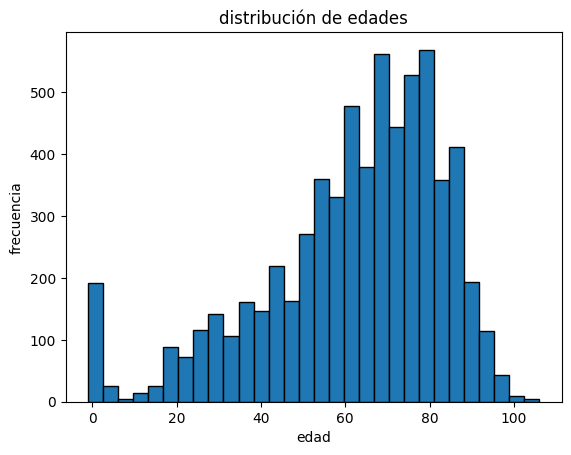

In [93]:
plt.hist(data['edad'], bins=30, edgecolor='black')
plt.xlabel('edad')
plt.ylabel('frecuencia')
plt.title('distribución de edades')
plt.show()

In [94]:
diagnostico_counts = data['DIAGNOSTICO'].value_counts().head(10)

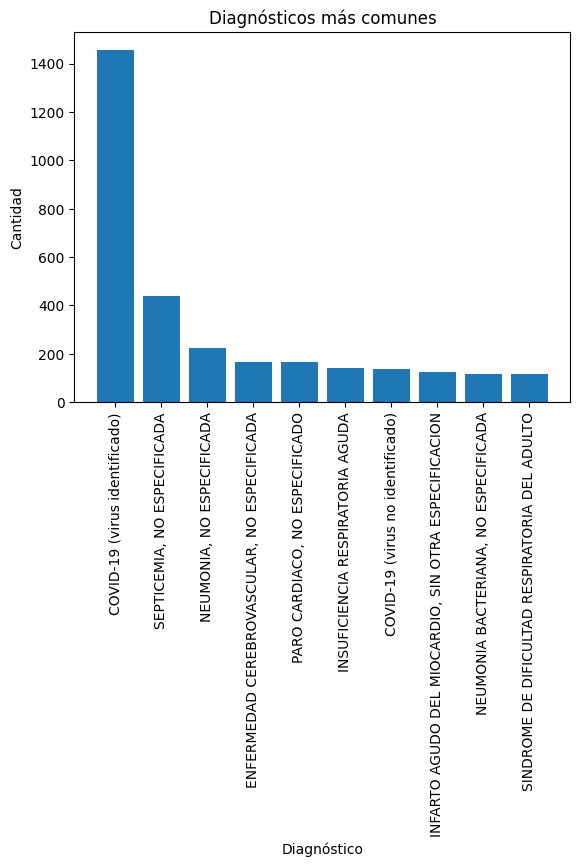

In [95]:
plt.bar(diagnostico_counts.index, diagnostico_counts.values)
plt.xlabel('Diagnóstico')
plt.ylabel('Cantidad')
plt.title('Diagnósticos más comunes')
plt.xticks(rotation=90)
plt.show()

In [96]:
sexo_counts = data['SEXO'].value_counts()

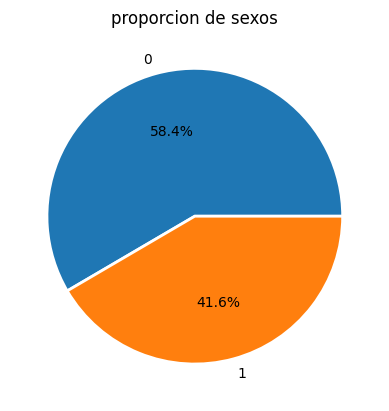

In [97]:
plt.pie(sexo_counts.values, labels=sexo_counts.index, autopct='%1.1f%%', wedgeprops={'linewidth':2, 'edgecolor':'white'})
plt.title('proporcion de sexos')
plt.show()

In [98]:
count_year = data['año'].value_counts().sort_index()

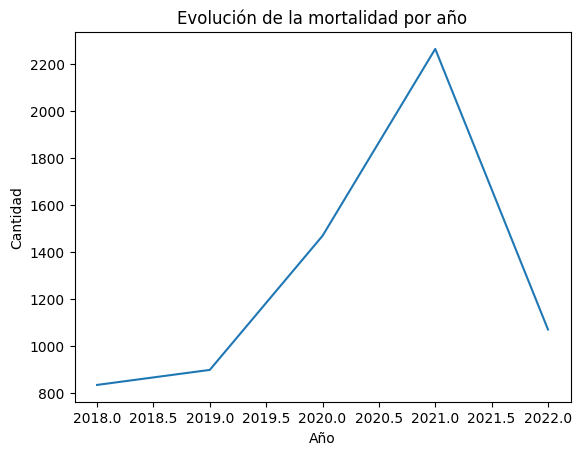

In [99]:
plt.plot(count_year.index, count_year.values)
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.title('Evolución de la mortalidad por año')
plt.show()

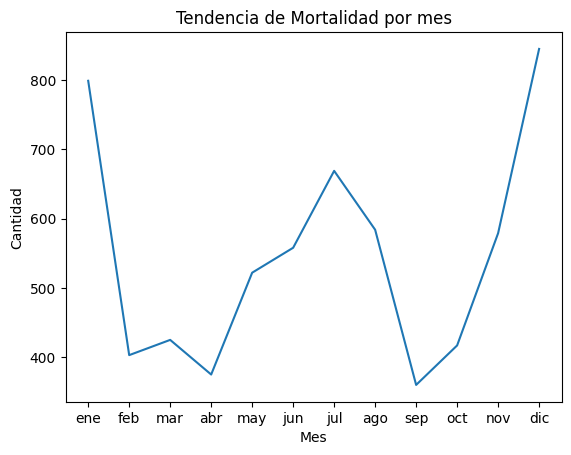

In [100]:
#Gráfico para mostrar la tendencia de mortalidad por mes

#convertimos la columna fecha a datetime
data['FECHA'] = pd.to_datetime(data['FECHA'])

#agrupamos los datos por mes y calcular el conteo de registros
count_for_month = data.groupby(data['FECHA'].dt.month)['FECHA'].count()

#gráfico de lineas
month = ['ene', 'feb', 'mar', 'abr', 'may', 'jun', 'jul', 'ago', 'sep', 'oct', 'nov', 'dic']

plt.plot(month, count_for_month)
plt.xlabel('Mes')
plt.ylabel('Cantidad')
plt.title('Tendencia de Mortalidad por mes')
plt.show()

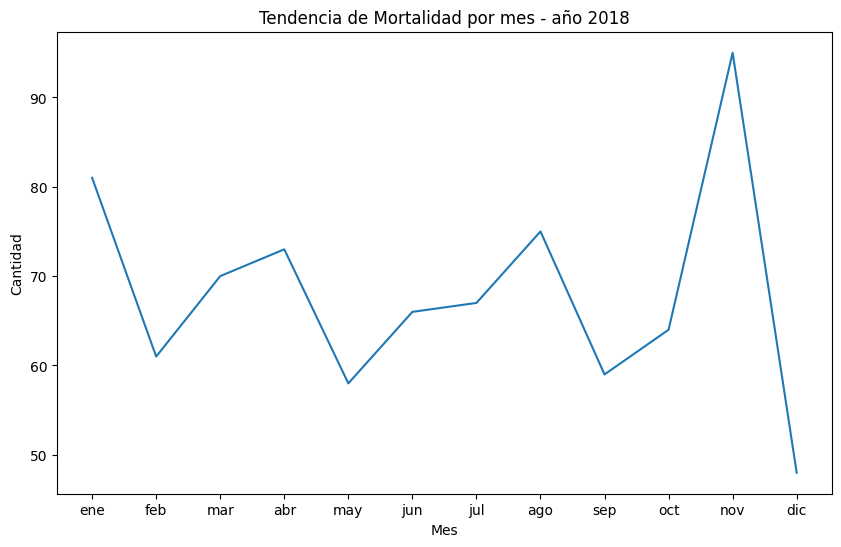

In [101]:
year = 2018

plt.figure(figsize=(10,6))


data_filtrada =  data[data['FECHA'].dt.year == year]
count_for_month = data_filtrada.groupby(data_filtrada['FECHA'].dt.month)['FECHA'].count()
meses = ['ene', 'feb', 'mar', 'abr', 'may', 'jun', 'jul', 'ago', 'sep', 'oct', 'nov', 'dic']

plt.plot(meses, count_for_month)
    
plt.xlabel('Mes')
plt.ylabel('Cantidad')
plt.title(f'Tendencia de Mortalidad por mes - año {year}')
plt.show()




In [102]:
#Transformación de object a datetime
data['FECHA'] = pd.to_datetime(data['FECHA'])

In [103]:
#Función que gráfica la mortalidad de cada año dividida en meses.
def mortalidad_anio(anio):
    year = anio
    data_filtrada =  data[data['FECHA'].dt.year == year]

    conteo_por_mes_s = data_filtrada.groupby([data_filtrada['FECHA'].dt.month, 'SEXO'])['FECHA'].count()
    
    data_tendencia = conteo_por_mes_s.unstack(level='SEXO')
    
    meses = ['ene', 'feb', 'mar', 'abr', 'may', 'jun', 'jul', 'ago', 'sep', 'oct', 'nov', 'dic']
    plt.plot(meses, data_tendencia[0], label='Hombres')
    plt.plot(meses, data_tendencia[1], label='Mujeres')
    plt.xlabel('Mes')
    plt.ylabel('Cantidad')
    plt.title(f'Tendencia de Mortalidad por mes - año{year}')
    plt.legend()
    plt.show()

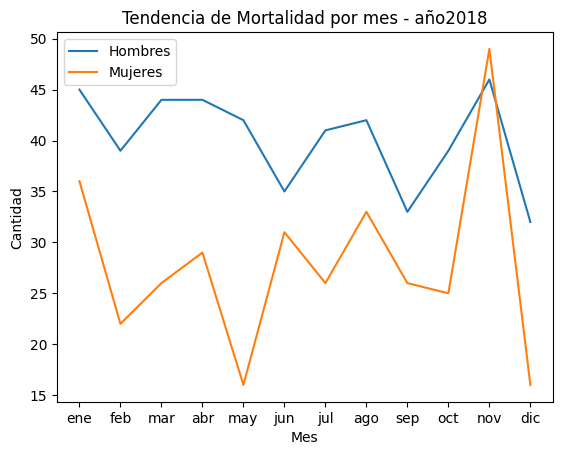

In [104]:
mortalidad_anio(2018)

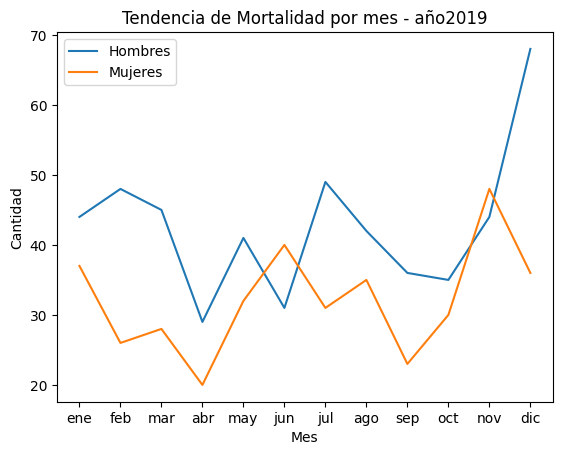

In [105]:
mortalidad_anio(2019)

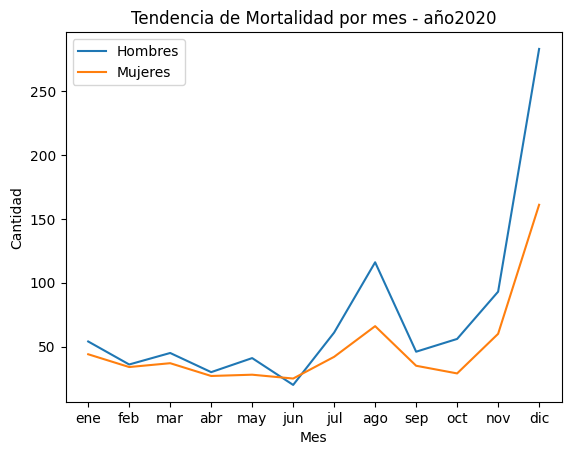

In [106]:
mortalidad_anio(2020)

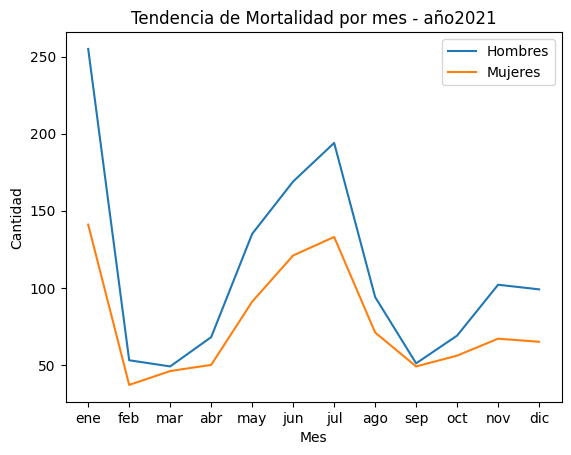

In [107]:
mortalidad_anio(2021)

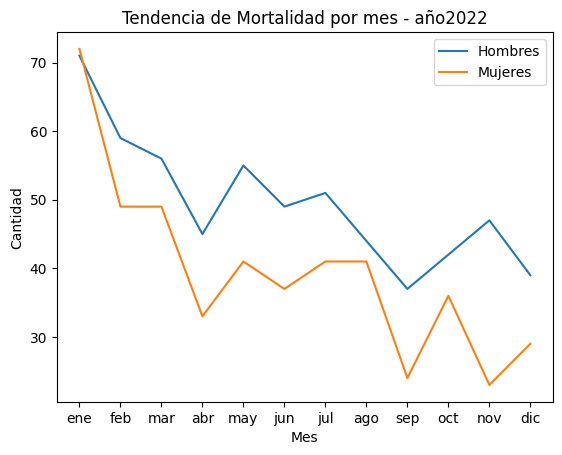

In [108]:
mortalidad_anio(2022)

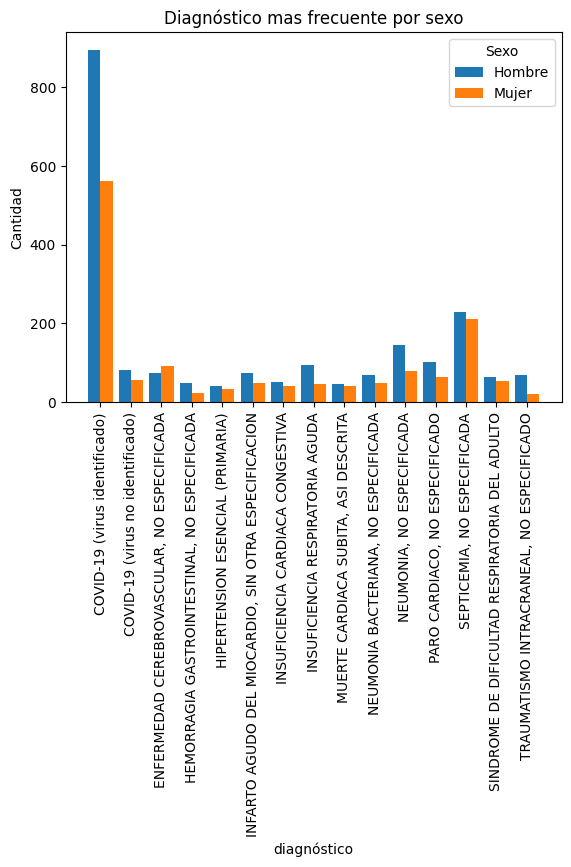

In [109]:
import numpy as np
diagnostico_counts_s = data['DIAGNOSTICO'].value_counts().head(15).index
data_filtrado_sexo = data[data['DIAGNOSTICO'].isin(diagnostico_counts_s)]
conteo_diagnostico_sexo = data_filtrado_sexo.groupby(['DIAGNOSTICO', 'SEXO']).size().unstack()

n = len(conteo_diagnostico_sexo)
width = 0.4
x = np.arange(n)

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, conteo_diagnostico_sexo[0], width, label='Hombre')
rects1 = ax.bar(x + width/2, conteo_diagnostico_sexo[1], width, label='Mujer')

ax.set_xlabel('diagnóstico')
ax.set_ylabel('Cantidad')
ax.set_title('Diagnóstico mas frecuente por sexo')
ax.set_xticks(x)
ax.set_xticklabels(conteo_diagnostico_sexo.index, rotation=90)
ax.legend(title='Sexo')
plt.show()

In [110]:
data['DIAGNOSTICO'].value_counts()

DIAGNOSTICO
COVID-19 (virus identificado)                                                    1456
SEPTICEMIA, NO ESPECIFICADA                                                       439
NEUMONIA, NO ESPECIFICADA                                                         224
ENFERMEDAD CEREBROVASCULAR, NO ESPECIFICADA                                       165
PARO CARDIACO, NO ESPECIFICADO                                                    165
                                                                                 ... 
TUMOR MALIGNO DEL CONDUCTO CRANEOFARINGEO                                           1
TUMOR MALIGNO DEL OMOPLATO Y DE LOS HUESOS LARGOS DEL MIEMBRO SUPERIOR              1
TUMOR MALIGNO DE LA PLEURA                                                          1
CALCULO DE CONDUCTO BILIAR CON COLECISTITIS                                         1
OTROS TRASTORNOS CEREBROVASCULARES EN ENFERMEDADES CLASIFICADAS EN OTRA PARTE       1
Name: count, Length: 807, dtype: int64

In [111]:
data['edad'].value_counts()

edad
67     165
71     164
80     153
70     144
73     143
      ... 
7        2
13       1
101      1
106      1
9        1
Name: count, Length: 105, dtype: int64

In [112]:
data['FECHA NACIO'] = pd.to_datetime(data['FECHA NACIO'])

In [113]:
data.dtypes

FECHA                                    datetime64[ns]
DIAGNOSTICO                                      object
FECHA NACIO                              datetime64[ns]
SEXO                                              int64
año                                               int64
SERVICIO_NEONATOLOGIA                              bool
SERVICIO_PEDIATRIA MEDICA                          bool
SERVICIO_RECUPERACION                              bool
SERVICIO_SALA DE PARTOS                            bool
SERVICIO_UCIN                                      bool
SERVICIO_UNIDAD DE CUIDADO INTERMEDIO              bool
SERVIVIO_PISO_5_12                                 bool
SERVICIO_URGENCIA ADULTO                           bool
SERVICIOS_URGENCIA PEDIATRIA                       bool
edad                                              int64
dtype: object

In [114]:
variables_incluidas = ['FECHA', 'FECHA NACIO', 'SEXO', 'año', 'SERVICIO_NEONATOLOGIA', 'SERVICIO_PEDIATRIA MEDICA',
                       'SERVICIO_RECUPERACION', 'SERVICIO_SALA DE PARTOS', 'SERVICIO_UCIN', 'SERVICIO_UNIDAD DE CUIDADO INTERMEDIO',
                       'SERVIVIO_PISO_5_12', 'SERVICIO_URGENCIA ADULTO', 'SERVICIOS_URGENCIA PEDIATRIA', 'edad', ]

data_filter = data[variables_incluidas]

correlation_matrix = data_filter.corr()

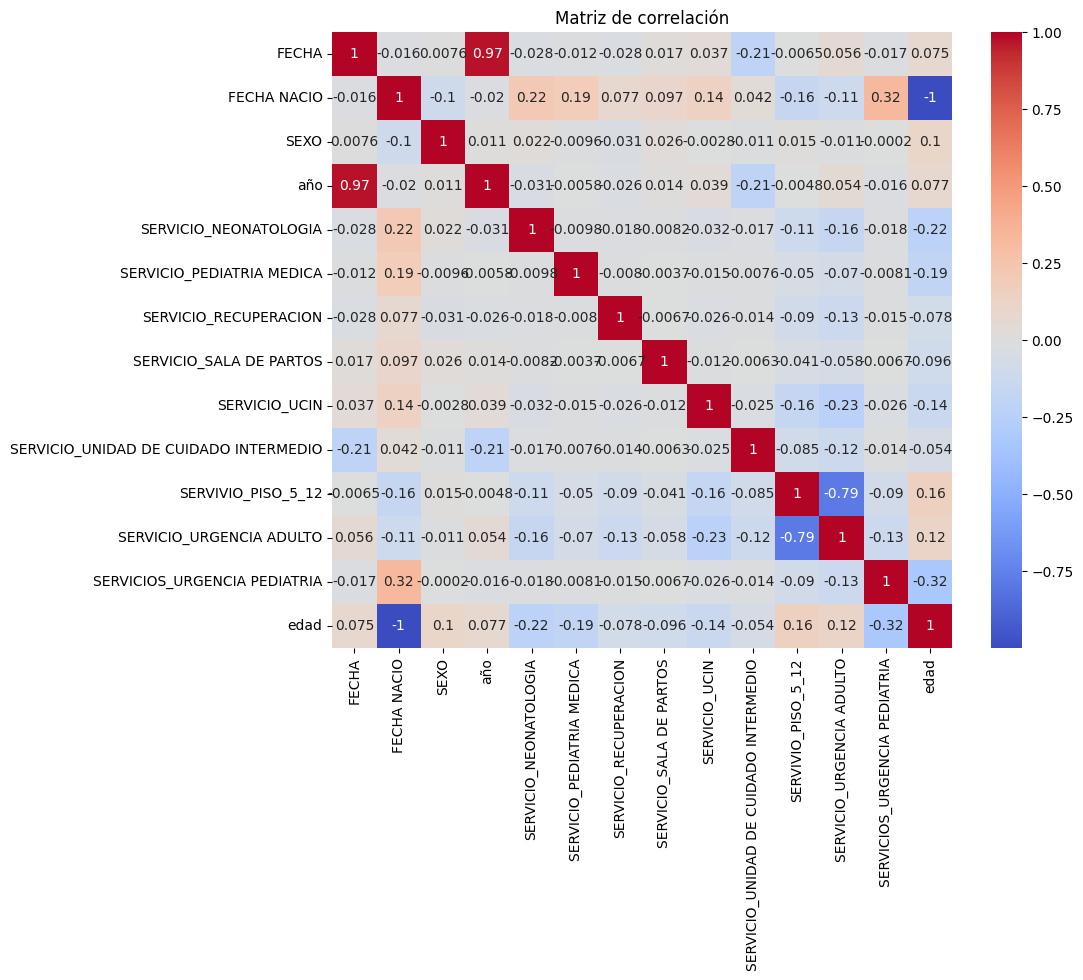

In [115]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

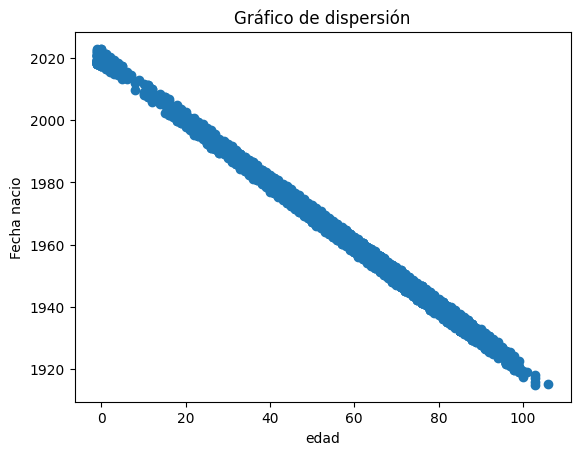

In [116]:
x = data['edad']
y =  data['FECHA NACIO']

plt.scatter(x,y)

plt.xlabel('edad')
plt.ylabel('Fecha nacio')
plt.title('Gráfico de dispersión')
plt.show()

### Procesamiento de texto

In [122]:
from nltk.tokenize import word_tokenize
diagnostico = data['DIAGNOSTICO']

In [123]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/dani94/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [130]:
diagnostico.apply(lambda x: word_tokenize(x))


0       [DIARREA, Y, GASTROENTERITIS, DE, PRESUNTO, OR...
1       [DIARREA, Y, GASTROENTERITIS, DE, PRESUNTO, OR...
2       [DIARREA, Y, GASTROENTERITIS, DE, PRESUNTO, OR...
3       [DIARREA, Y, GASTROENTERITIS, DE, PRESUNTO, OR...
4       [TUBERCULOSIS, DEL, PULMON, ,, CONFIRMADA, POR...
                              ...                        
6531    [CONTACTO, TRAUMATICO, CON, SERPIENTES, Y, LAG...
6532    [CONTACTO, TRAUMATICO, CON, AVISPONES, ,, AVIS...
6533    [AGRESION, CON, DISPARO, DE, OTRAS, ARMAS, DE,...
6534    [CONSULTA, PARA, INSTRUCCION, Y, VIGILANCIA, D...
6535    [CONSULTA, PARA, INSTRUCCION, Y, VIGILANCIA, D...
Name: DIAGNOSTICO, Length: 6536, dtype: object

In [131]:
#eliminar caracteres especiales utilizando expresiones regulares
diagnostico.apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))


0       DIARREA Y GASTROENTERITIS DE PRESUNTO ORIGEN I...
1       DIARREA Y GASTROENTERITIS DE PRESUNTO ORIGEN I...
2       DIARREA Y GASTROENTERITIS DE PRESUNTO ORIGEN I...
3       DIARREA Y GASTROENTERITIS DE PRESUNTO ORIGEN I...
4       TUBERCULOSIS DEL PULMON CONFIRMADA POR HALLAZG...
                              ...                        
6531    CONTACTO TRAUMATICO CON SERPIENTES Y LAGARTOS ...
6532    CONTACTO TRAUMATICO CON AVISPONES AVISPAS Y AB...
6533    AGRESION CON DISPARO DE OTRAS ARMAS DE FUEGO Y...
6534    CONSULTA PARA INSTRUCCION Y VIGILANCIA DE LA D...
6535    CONSULTA PARA INSTRUCCION Y VIGILANCIA DE LA D...
Name: DIAGNOSTICO, Length: 6536, dtype: object

In [132]:
#Convertir todo a minusculas
diagnostico.str.lower()


0       diarrea y gastroenteritis de presunto origen i...
1       diarrea y gastroenteritis de presunto origen i...
2       diarrea y gastroenteritis de presunto origen i...
3       diarrea y gastroenteritis de presunto origen i...
4       tuberculosis del pulmon, confirmada por hallaz...
                              ...                        
6531    contacto traumatico con serpientes y lagartos ...
6532    contacto traumatico con avispones, avispas y a...
6533    agresion con disparo de otras armas de fuego, ...
6534    consulta para instruccion y vigilancia de la d...
6535    consulta para instruccion y vigilancia de la d...
Name: DIAGNOSTICO, Length: 6536, dtype: object

In [133]:
#eliminacion de palabras comunes
from nltk.corpus import stopwords

nltk.download('stopwords')

stop_words = set(stopwords.words('spanish'))

diagnostico.apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))



[nltk_data] Downloading package stopwords to /home/dani94/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0       DIARREA GASTROENTERITIS PRESUNTO ORIGEN INFECC...
1       DIARREA GASTROENTERITIS PRESUNTO ORIGEN INFECC...
2       DIARREA GASTROENTERITIS PRESUNTO ORIGEN INFECC...
3       DIARREA GASTROENTERITIS PRESUNTO ORIGEN INFECC...
4       TUBERCULOSIS PULMON, CONFIRMADA HALLAZGO MICRO...
                              ...                        
6531    CONTACTO TRAUMATICO SERPIENTES LAGARTOS VENENO...
6532    CONTACTO TRAUMATICO AVISPONES, AVISPAS ABEJAS:...
6533    AGRESION DISPARO ARMAS FUEGO, ESPECIFICADAS: L...
6534                CONSULTA INSTRUCCION VIGILANCIA DIETA
6535                CONSULTA INSTRUCCION VIGILANCIA DIETA
Name: DIAGNOSTICO, Length: 6536, dtype: object

In [135]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

diagnostico.apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

[nltk_data] Downloading package wordnet to /home/dani94/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0       DIARREA Y GASTROENTERITIS DE PRESUNTO ORIGEN I...
1       DIARREA Y GASTROENTERITIS DE PRESUNTO ORIGEN I...
2       DIARREA Y GASTROENTERITIS DE PRESUNTO ORIGEN I...
3       DIARREA Y GASTROENTERITIS DE PRESUNTO ORIGEN I...
4       TUBERCULOSIS DEL PULMON, CONFIRMADA POR HALLAZ...
                              ...                        
6531    CONTACTO TRAUMATICO CON SERPIENTES Y LAGARTOS ...
6532    CONTACTO TRAUMATICO CON AVISPONES, AVISPAS Y A...
6533    AGRESION CON DISPARO DE OTRAS ARMAS DE FUEGO, ...
6534    CONSULTA PARA INSTRUCCION Y VIGILANCIA DE LA D...
6535    CONSULTA PARA INSTRUCCION Y VIGILANCIA DE LA D...
Name: DIAGNOSTICO, Length: 6536, dtype: object